# Datascience Project: Predicting Heart Diseases


The dataset used in this project was acquired from Kaggle:
https://www.kaggle.com/ronitf/heart-disease-uci

If you find this dataset helpfull, consider upvoting it on the platform.


### Acknowledgements:

Creators:

    Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779 

In [1]:
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv('heart.csv')
# df = pd.read_csv('heart_failure_clinical_records_dataset.xls')

###  First, let's understand the atributes:

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. age<br>
2. sex<br>
3. chest pain type (4 values)<br>
4. resting blood pressure<br>
5. serum cholestoral in mg/dl<br>
6. fasting blood sugar > 120 mg/dl<br>
7. resting electrocardiographic results (values 0,1,2)<br>
8. maximum heart rate achieved<br>
9. exercise induced angina<br>
10. oldpeak = ST depression induced by exercise relative to rest<br>
11. the slope of the peak exercise ST segment<br>
12. number of major vessels (0-3) colored by flourosopy<br>
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
14. target: 1 = has heart disease; 0 = has not

### Let's divide into categorical and continuous features

In [17]:
categorical = ['sex', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Are the labels equally distributed?

In [39]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### And the rest of the data?

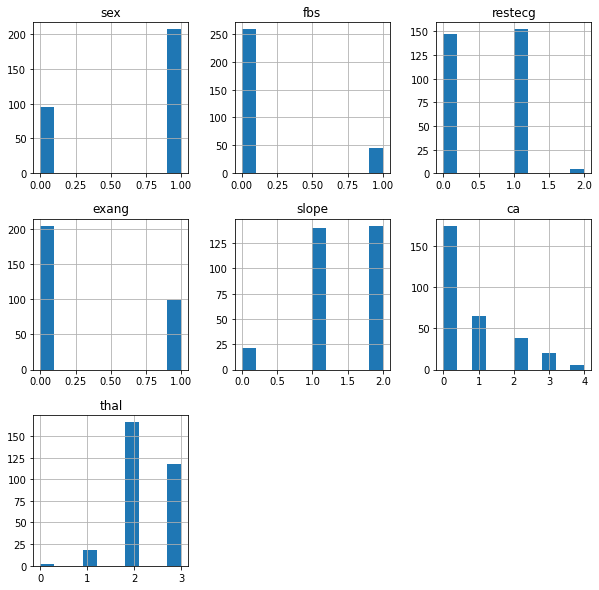

In [48]:
df[categorical].hist(figsize=(10,10));

In [52]:
df[continuous].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   trestbps  303 non-null    int64  
 2   chol      303 non-null    int64  
 3   thalach   303 non-null    int64  
 4   oldpeak   303 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 12.0 KB


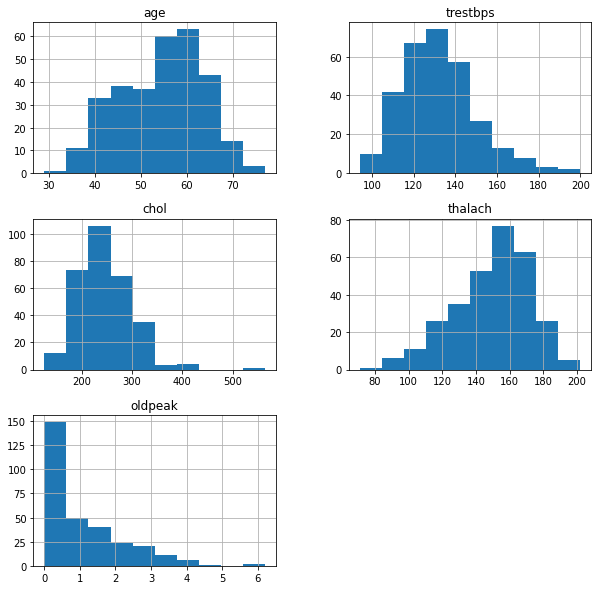

In [55]:
df[continuous].hist(figsize=(10,10));

In [56]:
df[continuous].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Checking for some correlations

In [60]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


Now we can see that some features are probably more important than others. 'fbs' for instance has an extremely low correlation to the target. Of course, we must still be careful, this method is not perfect as it doest not detect nonlinear relationships.

### Before we dive even deeper into the data analysis, it is a good idea to already divide the data into train and test

In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2,
random_state=27)

In [31]:
print('Size of the train set:',len(train_set))
print('Size of the test set:',len(test_set))


Size of the train set: 242
Size of the test set: 61
